# Drzewa decyzyjne

Aby zilustrować działanie klasycznego modelu drzewa klasyfikacyjnego wykorzystamy zbiór `iris`, zawierający dane na temat wielkości płatków i kielichów 150 kwiatów trzech odmian irysów, po 50 z każdego typu. 

## 1. Funkcja `ctree`

Na początek do budowy drzewa wykorzystamy funkcję `ctree`  z biblioteki `party`.

In [1]:
library(tidyverse)
options(jupyter.rich_display=FALSE,
        repr.plot.width=15,
        repr.plot.height=8)

In [2]:
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa 

In [3]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [4]:
glimpse(iris)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


In [5]:
library(party)
names(iris)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary



Attaching package: ‘party’


The following object is masked from ‘package:dplyr’:

    where




[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     

In [6]:
iris_ctree <- ctree(Species ~ ., data = iris)
print(iris_ctree)


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  150 

1) Petal.Length <= 1.9; criterion = 1, statistic = 140.264
  2)*  weights = 50 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 67.894
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) Petal.Length > 4.8
      6)*  weights = 8 
  3) Petal.Width > 1.7
    7)*  weights = 46 


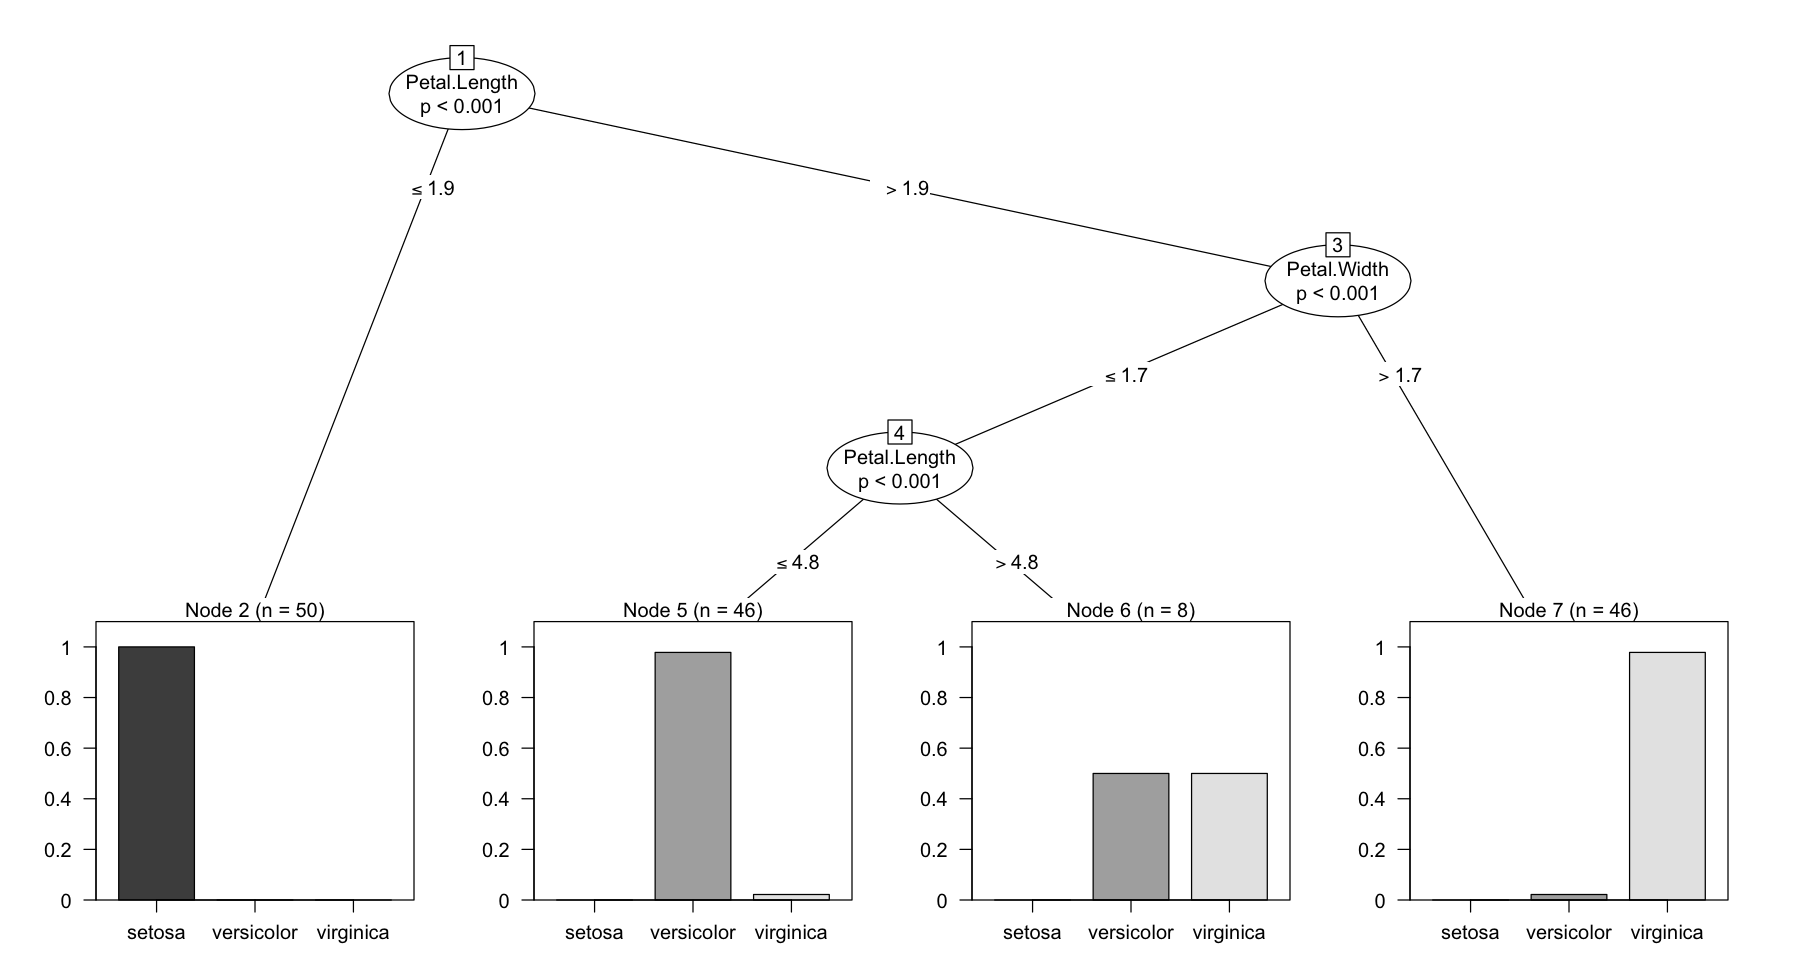

In [7]:
plot(iris_ctree)

Początkowo przypadki zostały podzielone na podstawie atrybutu `Petal.Length`. Dla wartości poniżej 1,9, kwiat został sklasyfikowany jako `setosa`. Następnie pozostałe przypadki zostały podzielone na podstawie zmiennej `Petal.Width`. Kwiaty o płatkach dłuższych niż 1,9 i szerszych niż 1,7 zostały rozpoznane jako `virginica`. Pozostałe przypadki zostały rozpoznane w kolejnym poddrzewie. Kwiaty o płatkach węższych niż 1,7 oraz dłuższych niż 4,8 zostały sklasyfikowane jako `versicolor`. Pozostałe przypadki mogą należeć do klas `versicolor` lub `virginica`.

Tak otrzymane drzewo jest bardzo proste, jednak mało skuteczne w klasyfikowaniu kwiatów jako `versicolor` lub `virginica`.

## 2 Funkcja `rpart`

Inną funkcją służącą do budowania drzew decyzyjnych w R jest `rpart` z pakietu `rpart`.

In [8]:
library(rpart)
set.seed(123)
model <- rpart(Species ~ ., data = iris, subset = c(sample(1:150, 75)), method = "class")
model

n= 75 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 75 45 virginica (0.3066667 0.2933333 0.4000000)  
  2) Petal.Length< 4.75 43 20 setosa (0.5348837 0.4651163 0.0000000)  
    4) Petal.Length< 2.45 23  0 setosa (1.0000000 0.0000000 0.0000000) *
    5) Petal.Length>=2.45 20  0 versicolor (0.0000000 1.0000000 0.0000000) *
  3) Petal.Length>=4.75 32  2 virginica (0.0000000 0.0625000 0.9375000) *

Liczby w nawiasach oznaczają odpowiednio prawdopodobieństwa przynależności do jednej z trzech klas irysów. Symbol `*` informuje, czy dany węzeł jest liściem.

Graficznie drzewo to możemy przedstawić za pomocą funkcji `plot` lub `rpart.plot` z pakietu `rpart.plot`:

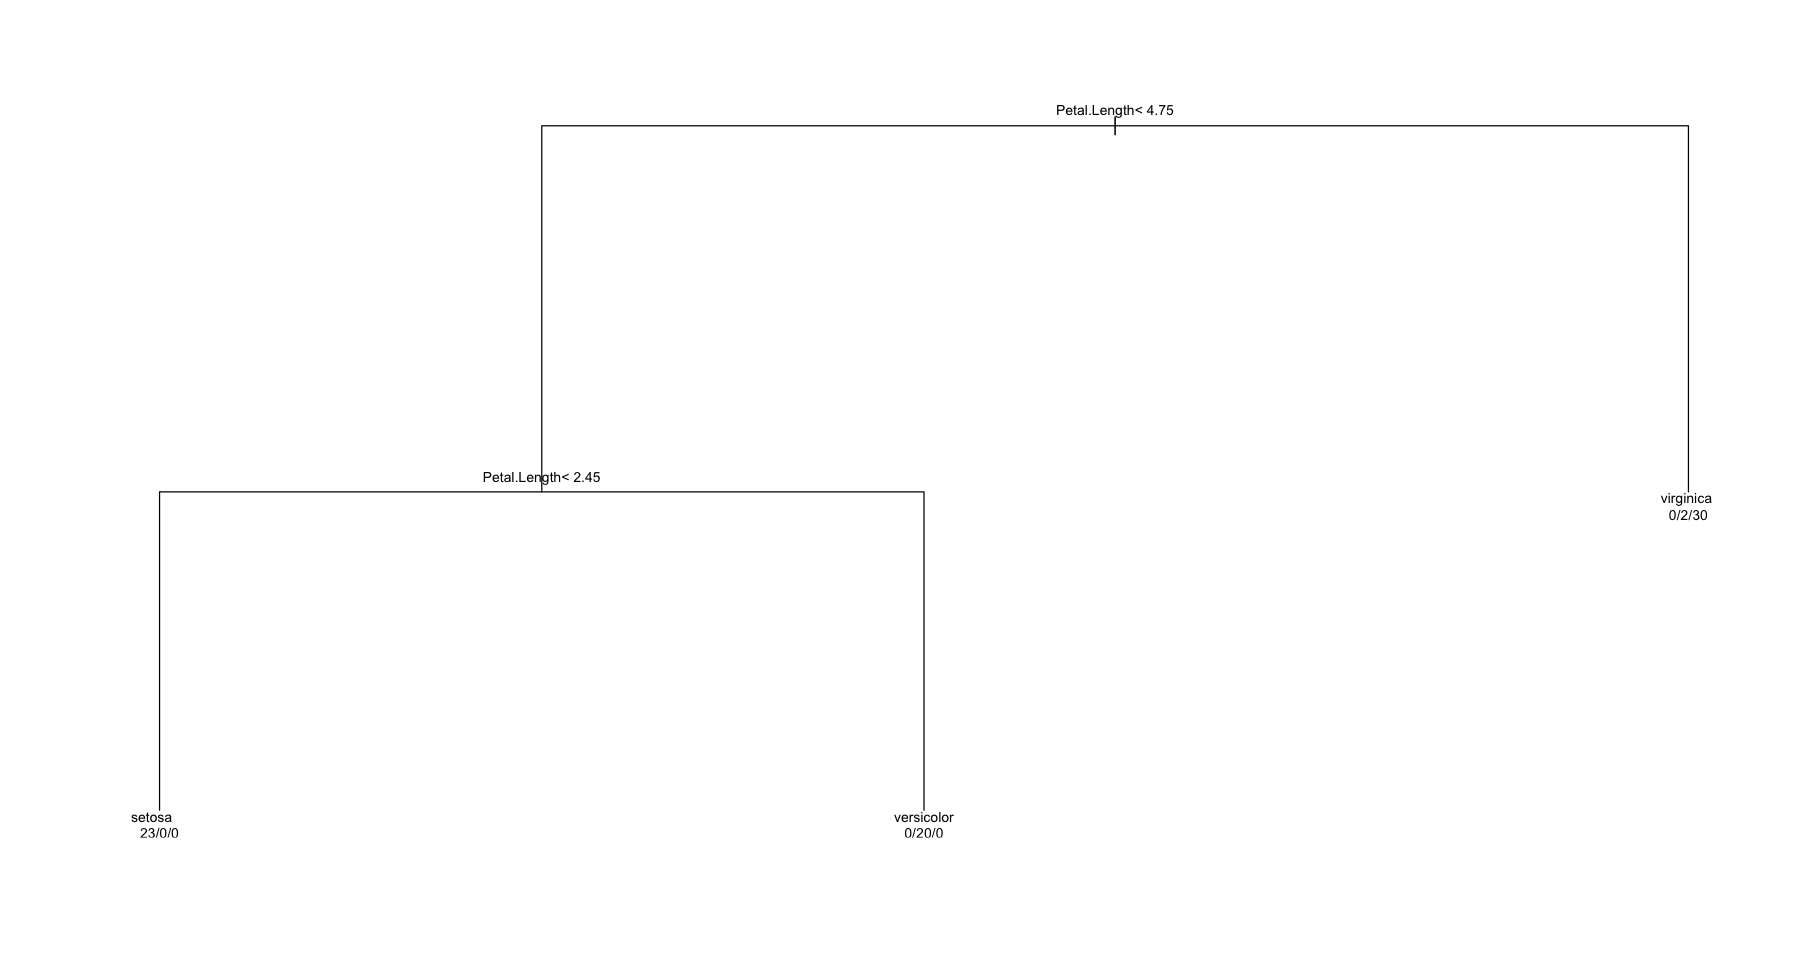

In [11]:
#use.n=TRUE - podaje liczebności klas w liściach
#all=TRUE - podaje klasę w węzłach
#cex - określa rozmiar czcionki
# plot(model, use.n = TRUE, all = TRUE, cex = 5r)
# library(rpart.plot)
plot(model)
text(model, use.n = TRUE, all = FALSE, cex = 0.7)

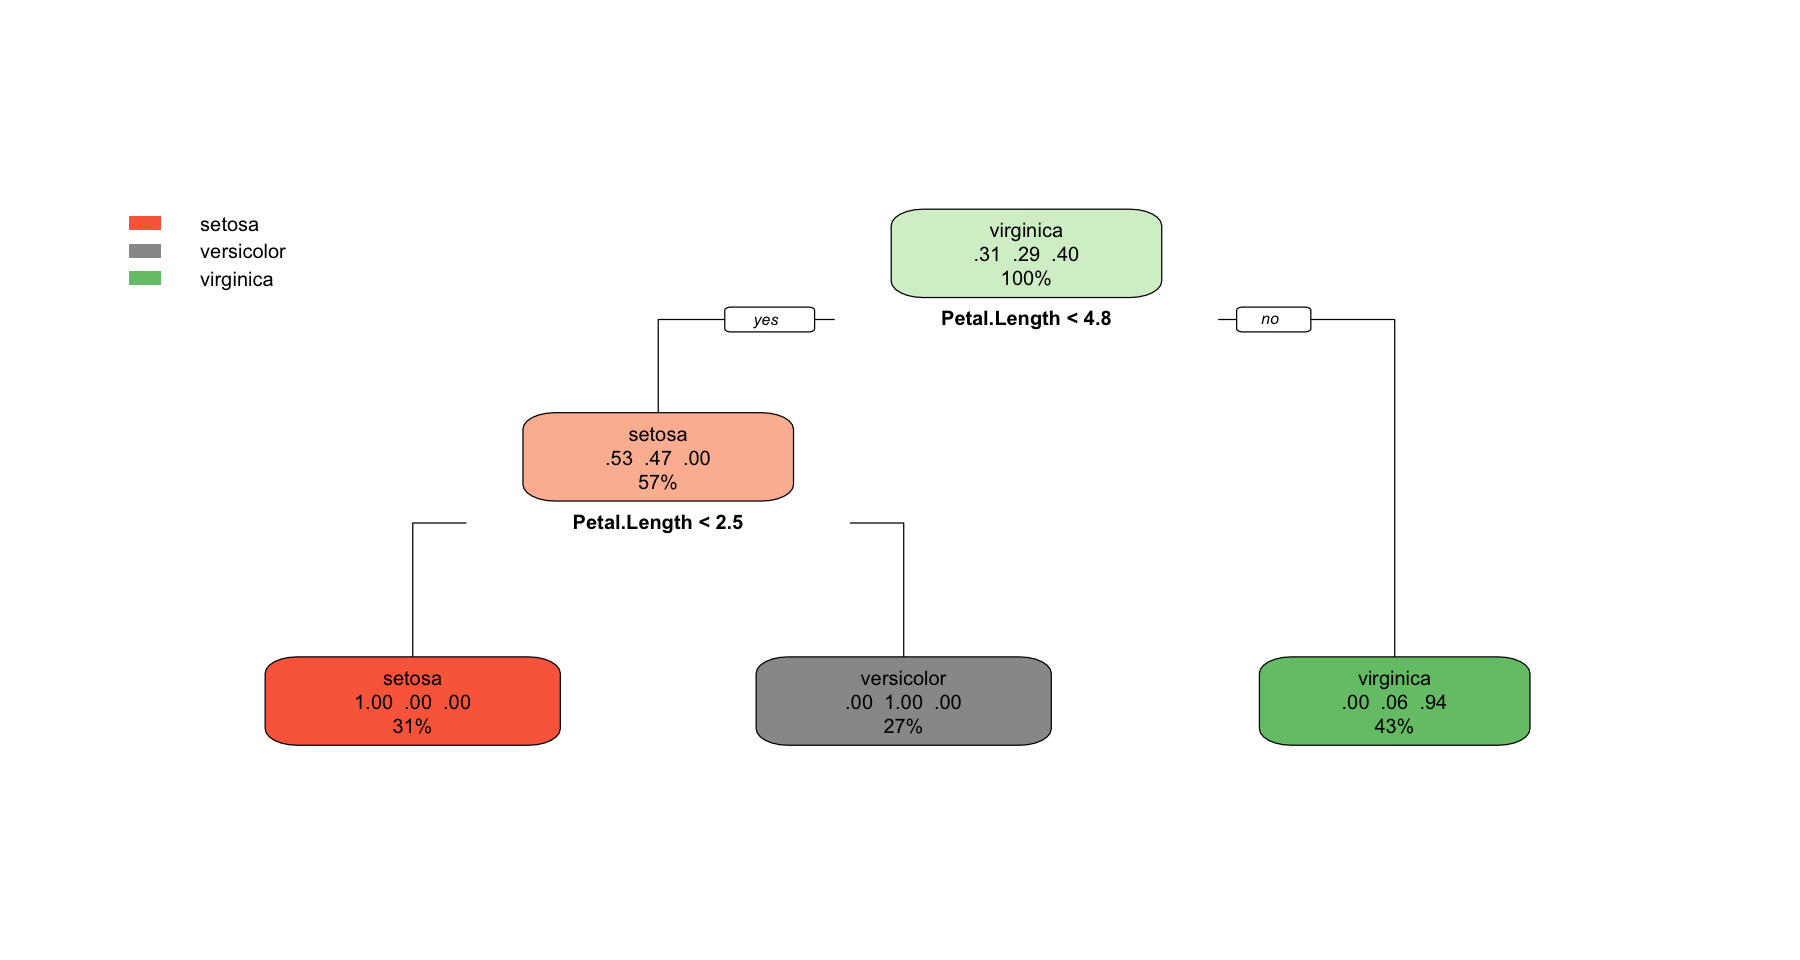

In [14]:
library(rpart.plot)
rpart.plot(model)

Na wykresie uzyskanym za pomocą funkcji `rpart.plot` Dolna etykieta (dla węzła korzenia to 100%) mówi o tym, jaką część oryginalnych danych reprezentuje partycja.

Dla drzew zapisanych jako obiekty klas `tree` lub `rpart` są dostępne dodatkowe funkcje umożliwiające modyfikację drzewa:

- `prune.rpart` - pozwala na automatyczne przycinanie drzewa. Argumenty funkcji służą do ustalania w jaki sposób drzewo ma zostać przycięte (pożądana liczba węzłów w drzewie, maksymalny współczynnik węzłów w liściu, itp.)

- `snip.rpart` - pozwala użytkownikowi wskazać myszką węzły drzewa, które mają zostać usunięte.

- `misclass.tree` - wyznacza błąd klasyfikacji dla każdego węzła

- `partition.tree` - wyznacza obszary decyzyjne dla drzew


## 3. Zadania

1. Pobierz i wczytaj w RStudio plik z danymi `Movie_classification.csv`. Celem zadania jest przewidzenie, czy dany film otrzyma Oskara czy też nie (zmienna dychotomiczna `Start_Tech_Oskar`).

*pozwole sobie zrobic w to jupyter notebooku a nie rstudio:)*

In [38]:
movies <- read_csv("./data/Movie_classification.csv")
names(movies) <- gsub(" ", "_", names(movies))
names(movies)[names(movies) == '3D_available'] <- 'is_3D_available'

Rows: 506 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 3D_available, Genre
dbl (17): Marketing expense, Production expense, Multiplex coverage, Budget,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


2. Przyglądnij się danym i przygotuj je do dalszej analizy.

In [39]:
summary(movies)

 Marketing_expense Production_expense Multiplex_coverage     Budget     
 Min.   :  20.13   Min.   : 55.92     Min.   :0.1290     Min.   :19781  
 1st Qu.:  21.64   1st Qu.: 65.38     1st Qu.:0.3760     1st Qu.:32694  
 Median :  25.13   Median : 74.38     Median :0.4620     Median :34488  
 Mean   :  92.27   Mean   : 77.27     Mean   :0.4453     Mean   :34911  
 3rd Qu.:  93.54   3rd Qu.: 91.20     3rd Qu.:0.5510     3rd Qu.:36794  
 Max.   :1799.52   Max.   :110.48     Max.   :0.6150     Max.   :48773  
                                                                        
  Movie_length   Lead__Actor_Rating Lead_Actress_rating Director_rating
 Min.   : 76.4   Min.   :3.840      Min.   :4.035       Min.   :3.840  
 1st Qu.:118.5   1st Qu.:7.316      1st Qu.:7.504       1st Qu.:7.296  
 Median :151.0   Median :8.307      Median :8.495       Median :8.312  
 Mean   :142.1   Mean   :8.014      Mean   :8.186       Mean   :8.020  
 3rd Qu.:167.6   3rd Qu.:8.865      3rd Qu.:9.030       

In [40]:
glimpse(movies)

Rows: 506
Columns: 19
$ Marketing_expense   <dbl> 20.1264, 20.5462, 20.5458, 20.6474, 21.3810, 20.59…
$ Production_expense  <dbl> 59.62, 69.14, 69.14, 59.36, 59.36, 59.36, 70.74, 7…
$ Multiplex_coverage  <dbl> 0.462, 0.531, 0.531, 0.542, 0.542, 0.542, 0.476, 0…
$ Budget              <dbl> 36524.12, 35668.65, 39912.68, 38873.89, 39701.58, …
$ Movie_length        <dbl> 138.7, 152.4, 134.6, 119.3, 127.7, 132.2, 140.1, 1…
$ Lead__Actor_Rating  <dbl> 7.825, 7.505, 7.485, 6.895, 6.920, 6.890, 7.065, 6…
$ Lead_Actress_rating <dbl> 8.095, 7.650, 7.570, 7.035, 7.070, 7.100, 7.265, 7…
$ Director_rating     <dbl> 7.910, 7.440, 7.495, 6.920, 6.815, 6.885, 7.150, 6…
$ Producer_rating     <dbl> 7.995, 7.470, 7.515, 7.020, 7.070, 7.005, 7.400, 7…
$ Critic_rating       <dbl> 7.94, 7.44, 7.44, 8.26, 8.26, 7.26, 8.96, 7.96, 7.…
$ Trailer_views       <dbl> 527367, 494055, 547051, 516279, 531448, 498425, 45…
$ is_3D_available     <chr> "YES", "NO", "NO", "YES", "NO", "YES", "YES", "NO"…
$ Time_taken      

In [41]:
movies <- movies %>%
  mutate(
    Trailer_views = as.integer(Trailer_views),
    is_3D_available = is_3D_available == "YES",
    Genre = as.factor(Genre),
    Avg_age_actors = as.integer(Avg_age_actors),
    Num_multiplex = as.integer(Num_multiplex),
    Collection = as.integer(Collection),
    Start_Tech_Oscar = as.factor(Start_Tech_Oscar),
  )

In [42]:
glimpse(movies)

Rows: 506
Columns: 19
$ Marketing_expense   <dbl> 20.1264, 20.5462, 20.5458, 20.6474, 21.3810, 20.59…
$ Production_expense  <dbl> 59.62, 69.14, 69.14, 59.36, 59.36, 59.36, 70.74, 7…
$ Multiplex_coverage  <dbl> 0.462, 0.531, 0.531, 0.542, 0.542, 0.542, 0.476, 0…
$ Budget              <dbl> 36524.12, 35668.65, 39912.68, 38873.89, 39701.58, …
$ Movie_length        <dbl> 138.7, 152.4, 134.6, 119.3, 127.7, 132.2, 140.1, 1…
$ Lead__Actor_Rating  <dbl> 7.825, 7.505, 7.485, 6.895, 6.920, 6.890, 7.065, 6…
$ Lead_Actress_rating <dbl> 8.095, 7.650, 7.570, 7.035, 7.070, 7.100, 7.265, 7…
$ Director_rating     <dbl> 7.910, 7.440, 7.495, 6.920, 6.815, 6.885, 7.150, 6…
$ Producer_rating     <dbl> 7.995, 7.470, 7.515, 7.020, 7.070, 7.005, 7.400, 7…
$ Critic_rating       <dbl> 7.94, 7.44, 7.44, 8.26, 8.26, 7.26, 8.96, 7.96, 7.…
$ Trailer_views       <int> 527367, 494055, 547051, 516279, 531448, 498425, 45…
$ is_3D_available     <lgl> TRUE, FALSE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE…
$ Time_taken      

In [46]:
movies %>%
    filter(if_any(everything(), is.na)) %>%
    nrow()

[1] 12

In [54]:
movies <- movies %>%
    filter(if_all(everything(), ~!is.na(.)))

In [59]:
# ggplot(movies, aes(x=Marketing_expense)) +
#     geom_histogram()

In [58]:
# ggplot(movies, aes(x=Marketing_expense)) +
#     geom_boxplot()

In [73]:
set.seed(123)
split <- rsample::initial_split(movies, prop = 0.75)

mov_train_data <- rsample::training(split)
mov_test_data <- rsample::testing(split)

3. Utwórz model drzewa klasyfikacyjnego na danych treningowych.

In [84]:
?ctree

ctree                  package:party                   R Documentation

_C_o_n_d_i_t_i_o_n_a_l _I_n_f_e_r_e_n_c_e _T_r_e_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Recursive partitioning for continuous, censored, ordered, nominal
     and multivariate response variables in a conditional inference
     framework.

_U_s_a_g_e:

     ctree(formula, data, subset = NULL, weights = NULL, 
           controls = ctree_control(), xtrafo = ptrafo, ytrafo = ptrafo, 
           scores = NULL)
     
_A_r_g_u_m_e_n_t_s:

 formula: a symbolic description of the model to be fit. Note that
          symbols like ‘:’ and ‘-’ will not work and the tree will make
          use of all variables listed on the rhs of ‘formula’.

    data: a data frame containing the variables in the model.

  subset: an optional vector specifying a subset of observations to be
          used in the fitting process.

 weights: an optional vector of weights to be used in the fitting
  

In [91]:
mov_ctree1 <- ctree(Start_Tech_Oscar ~ ., data = mov_train_data)

In [92]:
print(mov_ctree1)


	 Conditional inference tree with 3 terminal nodes

Response:  Start_Tech_Oscar 
Inputs:  Marketing_expense, Production_expense, Multiplex_coverage, Budget, Movie_length, Lead__Actor_Rating, Lead_Actress_rating, Director_rating, Producer_rating, Critic_rating, Trailer_views, is_3D_available, Time_taken, Twitter_hastags, Genre, Avg_age_actors, Num_multiplex, Collection 
Number of observations:  370 

1) Collection <= 63000; criterion = 0.983, statistic = 10.948
  2) Budget <= 30885.8; criterion = 1, statistic = 17.917
    3)*  weights = 35 
  2) Budget > 30885.8
    4)*  weights = 282 
1) Collection > 63000
  5)*  weights = 53 


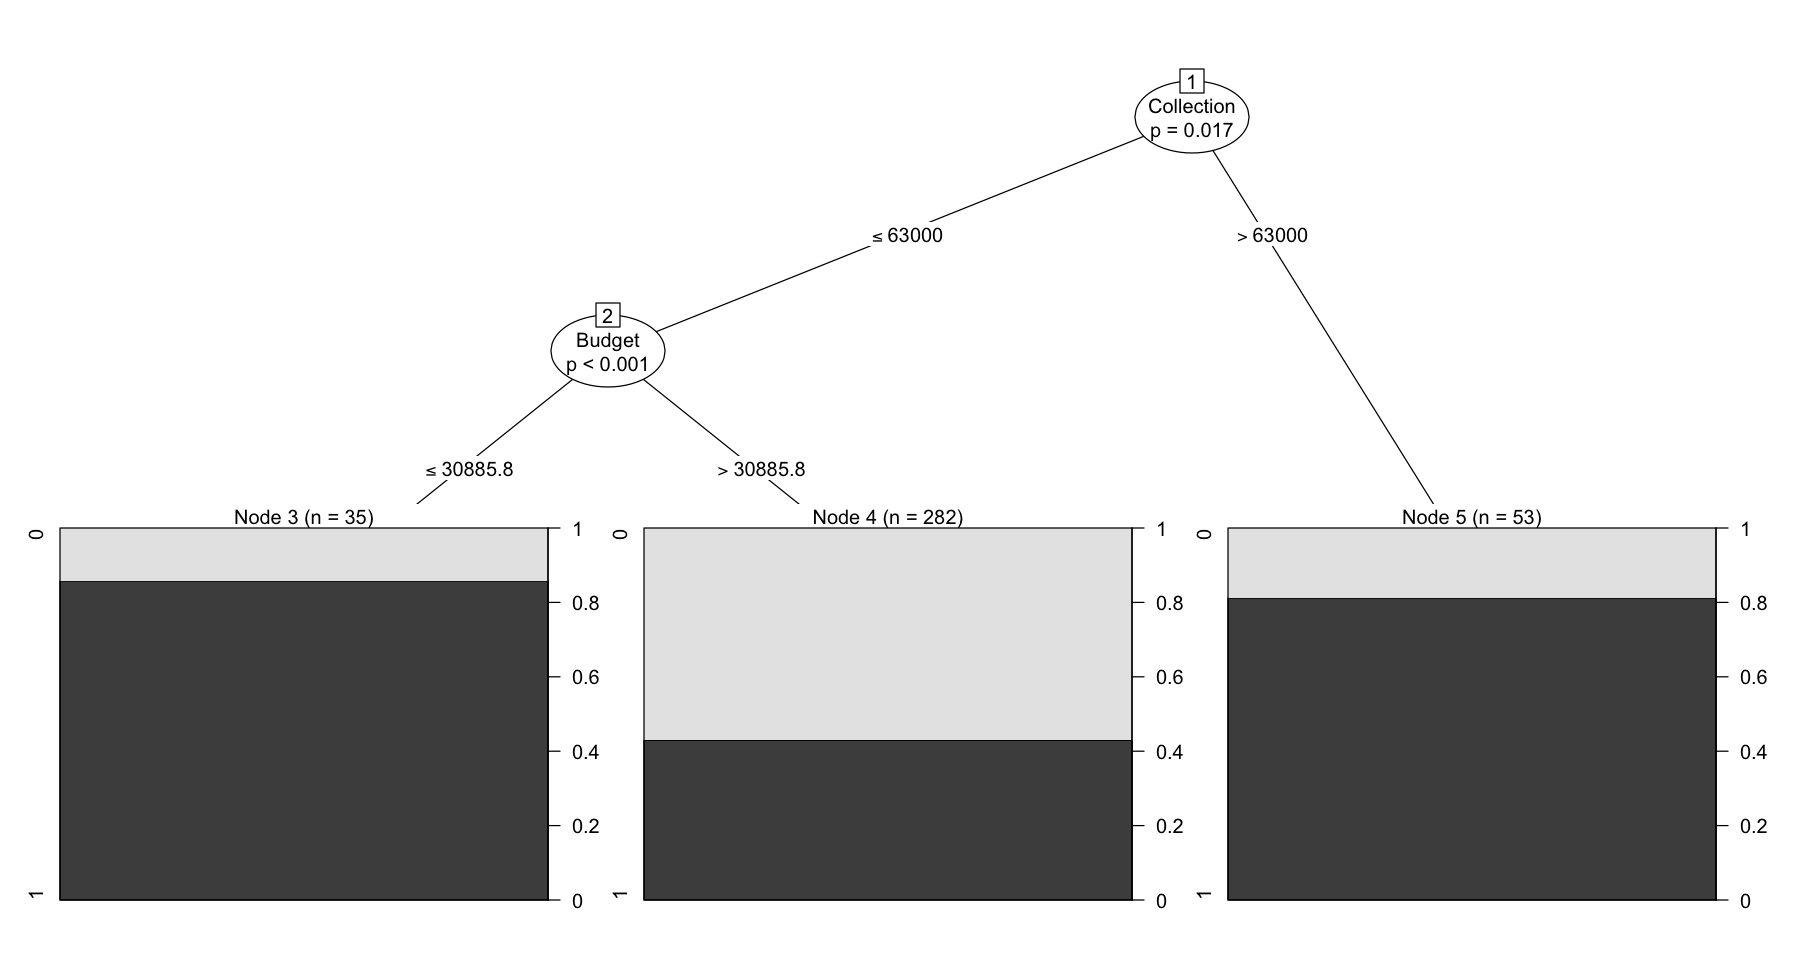

In [93]:
plot(mov_tree_model)

In [82]:
mov_rpart1 <- rpart(Start_Tech_Oscar ~ ., data = train_data, method = "class")
summary(mov_rpart1)

Call:
rpart(formula = Start_Tech_Oscar ~ ., data = train_data, method = "class")
  n= 370 

          CP nsplit rel error    xerror       xstd
1 0.11363636      0 1.0000000 1.0000000 0.05458127
2 0.06818182      2 0.7727273 0.9090909 0.05414472
3 0.02272727      3 0.7045455 0.8750000 0.05387332
4 0.01704545     11 0.4602273 0.8409091 0.05354190
5 0.01000000     12 0.4431818 0.7613636 0.05252848

Variable importance
             Budget Lead_Actress_rating       Trailer_views     Producer_rating 
                 14                  10                  10                  10 
 Lead__Actor_Rating          Collection     Director_rating   Marketing_expense 
                  9                   9                   8                   7 
 Production_expense  Multiplex_coverage     Twitter_hastags       Num_multiplex 
                  6                   5                   4                   3 
     Avg_age_actors        Movie_length               Genre 
                  2               

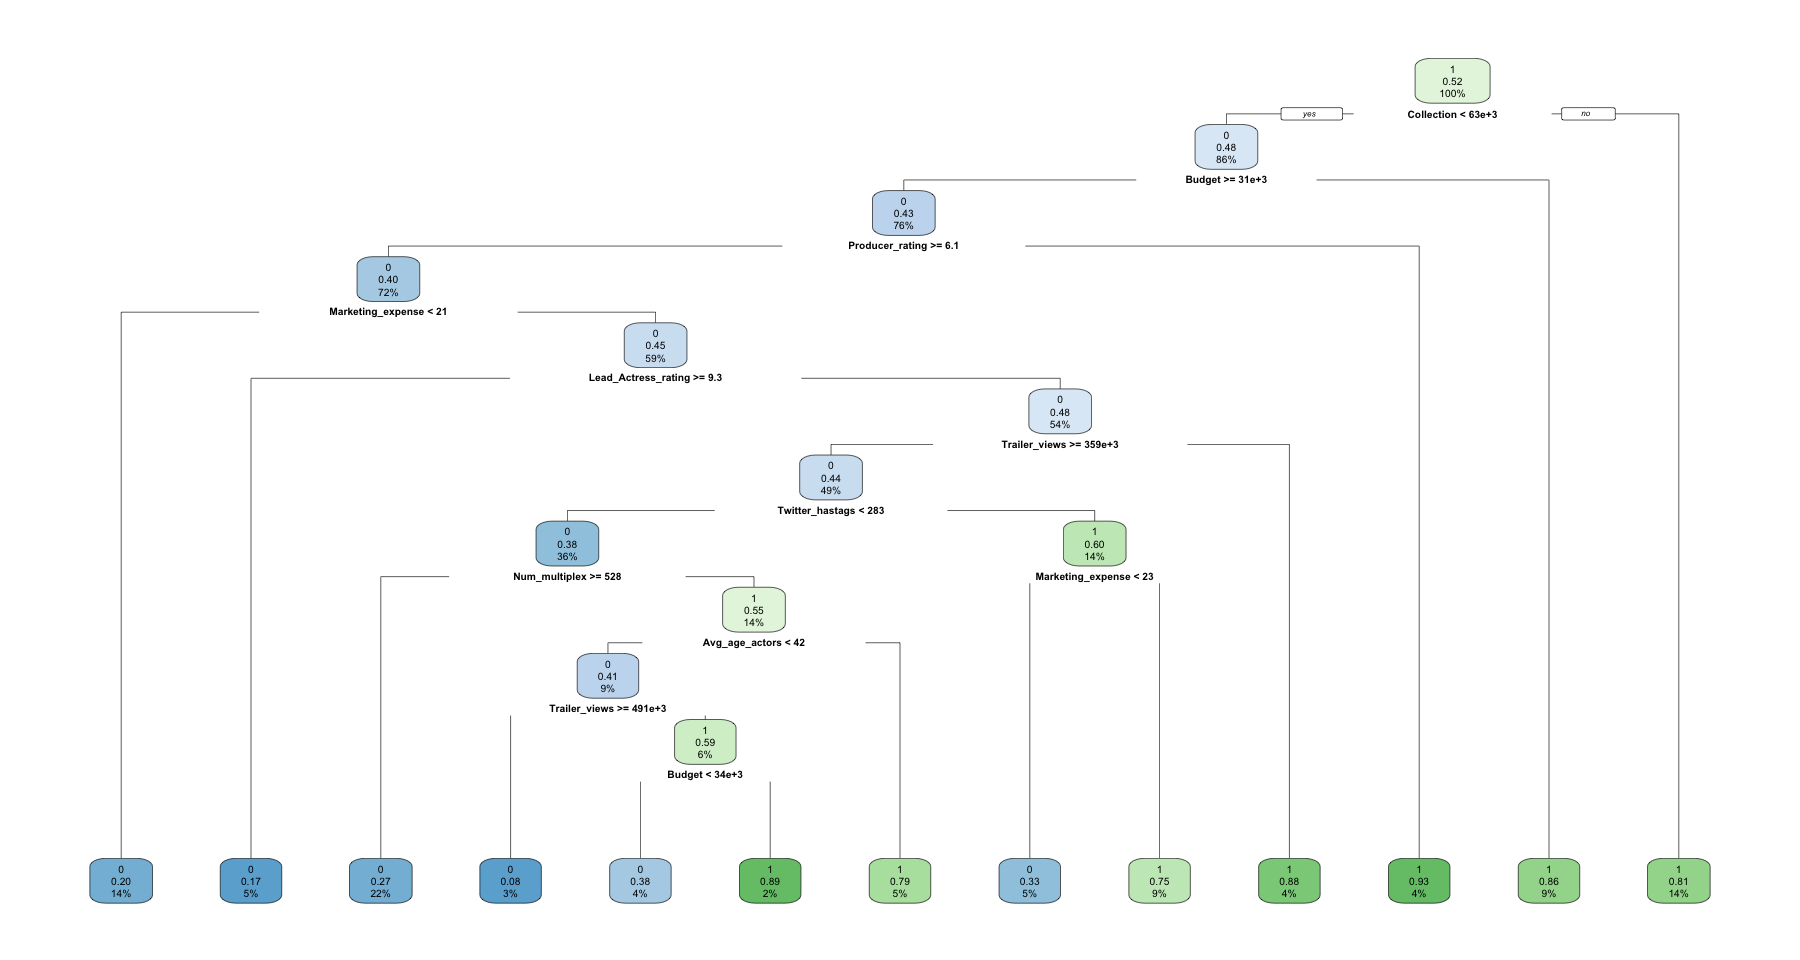

In [83]:
# rpart.plot(tree_model, type = 3, extra = 101, fallen.leaves = TRUE)
rpart.plot(mov_rpart1)


4. Przedstaw graficznie utworzone drzewo (np. użyj funkcji `rpart.plot`).

5. Sprawdź działanie modelu na danych testowych. W tym celu stwórz zbiór predykcji bazujących na tym modelu (funkcja `predict`).

6. Sprawdź dokładność predykcji. W tym celu utwórz macierz pomyłek porównującą dane rzeczywiste z przewidywanymi przez model (funkcja `table`). Na jej podstawie oblicz dokładność predykcji.